In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
import os
import sys
%matplotlib inline
plt.style.use('seaborn-whitegrid') # theme
plt.rcParams['figure.figsize'] = (12,8) # taille des figures

package_dir = os.path.dirname(os.path.abspath(sys.argv[1]))
file_name = "exctract_enrichies"
thefile = os.path.join(package_dir, file_name+'.csv')
print(thefile)

ext = pd.read_csv(thefile)
print(ext.shape)
print(ext.dtypes)
ext.head()

# Creer une catégorie gain : ['bmkr_gain', 'null_gain', 'max_gain']

# 13 	1 	2019-10-19 19:00:00 	Saturday 	19:00 	1.62 	6.20 	3.77 	AWAY 	AWAY 	0 	0 	1 	2019/2020 	Angers 	Brest

/home/sam/Documents/cours/python/football-ligue-1-scraping-eda-master/exctract_enrichies.csv
(5972, 17)
date                 object
day                  object
hours                object
odds_a              float64
odds_b              float64
odds_draw           float64
score_a               int64
score_b               int64
season               object
team_a               object
team_b               object
outcome_effectif     object
min_odds             object
max_odds             object
good_pred             int64
worst_pred            int64
draw_pred             int64
dtype: object


,date,day,hours,odds_a,odds_b,odds_draw,score_a,score_b,season,team_a,team_b,outcome_effectif,min_odds,max_odds,good_pred,worst_pred,draw_pred
0,2019-11-10 14:00:00,Sunday,14:00,2.08,3.83,3.29,3,1,2019/2020,Rennes,Amiens,HOME,HOME,AWAY,1,0,0
1,2019-11-09 19:00:00,Saturday,19:00,1.54,7.27,3.89,0,0,2019/2020,Lille,Metz,DRAW,HOME,AWAY,0,0,1
2,2019-11-09 19:00:00,Saturday,19:00,1.42,7.32,4.86,1,0,2019/2020,Monaco,Dijon,HOME,HOME,AWAY,1,0,0
3,2019-11-09 19:00:00,Saturday,19:00,2.63,3.07,2.97,0,0,2019/2020,Reims,Angers,DRAW,HOME,AWAY,0,0,1
4,2019-11-09 19:00:00,Saturday,19:00,1.83,4.83,3.44,4,1,2019/2020,Strasbourg,Nimes,HOME,HOME,AWAY,1,0,0


In [91]:
ext.describe()

,odds_a,odds_b,odds_draw,score_a,score_b
count,5956.000000,5956.000000,5956.000000,5956.000000,5956.000000
mean,2.405693,4.409426,3.463326,1.404634,1.011921
std,1.323759,2.960352,0.951389,1.200674,1.052617
min,1.040000,1.110000,2.380000,0.000000,0.000000
25%,1.740000,2.820000,3.040000,1.000000,0.000000
50%,2.115000,3.670000,3.200000,1.000000,1.000000
75%,2.610000,5.050000,3.502500,2.000000,2.000000
max,28.980000,48.260000,18.070000,9.000000,9.000000


count    5972.000000
mean        0.210817
std         0.407923
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: worst_pred, dtype: float64


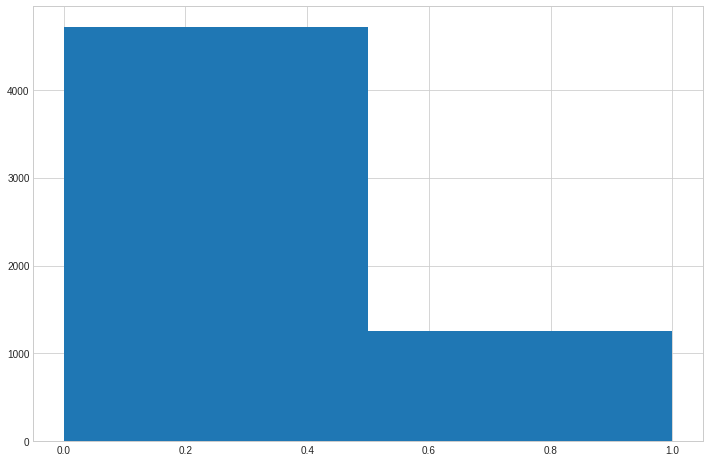

In [437]:
#bmkr_loss
print(ext.worst_pred.describe())
ext.worst_pred.hist(bins=2)
#En moyenne le booky se trombe dans 20% des cas 

In [440]:
#print(ext.draw_pred.describe()) #mean        0.288178
#print(ext.worst_pred.describe()) #mean         0.210817
#print(ext.good_pred.describe()) #mean        0.501005
print(0.288178 +  0.210817 +  0.501005)

1.0


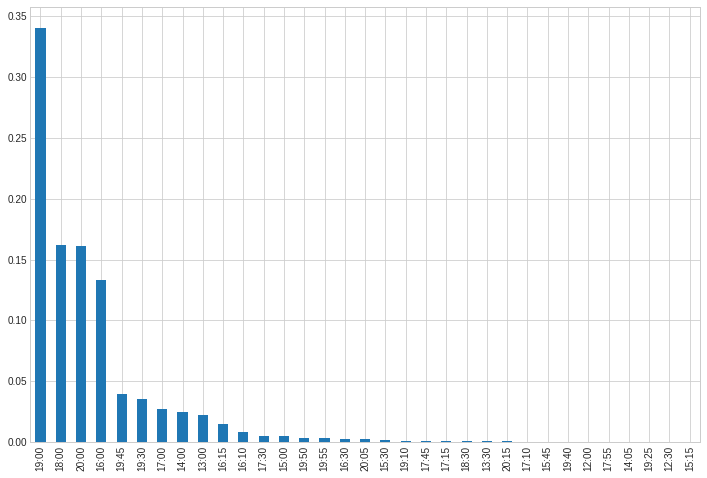

In [442]:
# distribution des heurs des matches
ext['hours'].value_counts(normalize=True).plot(kind='bar')

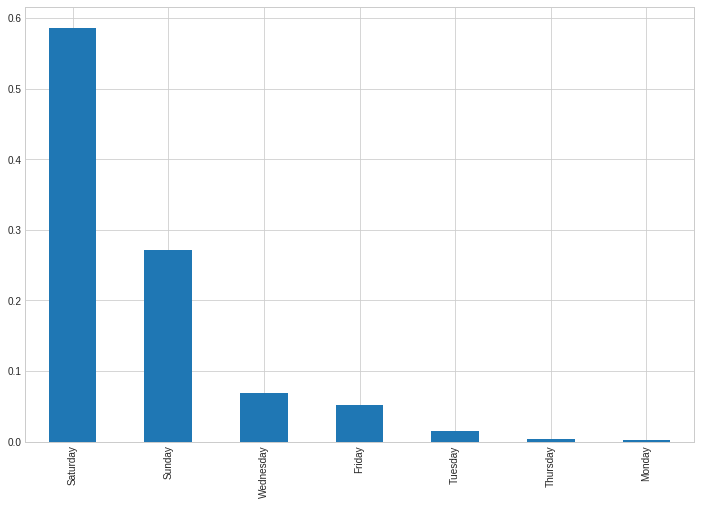

In [443]:
ext['day'].value_counts(normalize=True).plot(kind='bar')

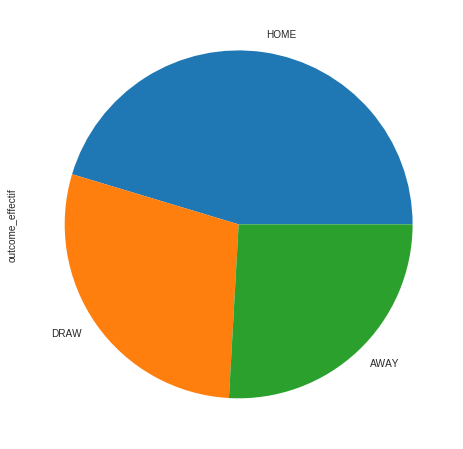

In [445]:
ext.head(5)
ext['outcome_effectif'].value_counts(normalize=True).plot(kind='pie')

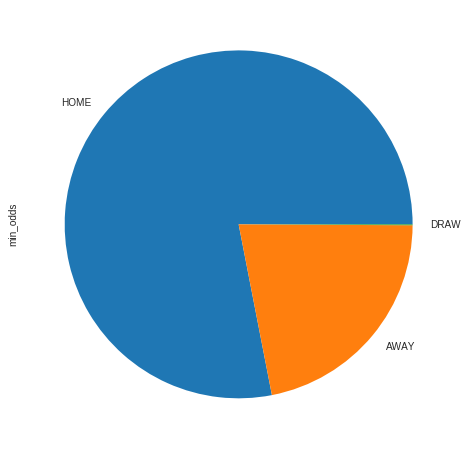

In [451]:
ext.head(5)
# pred du bookmaker
ext['min_odds'].value_counts(normalize=True).plot(kind='pie')


HOME    0.739476
AWAY    0.260524
Name: min_odds, dtype: float64


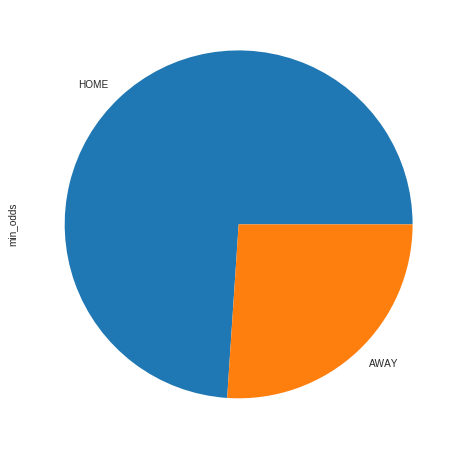

In [510]:
# quand le bookmaker se trompe, qui avait il mit gagnant ?
print(ext[ext.worst_pred == 1]['min_odds'].value_counts(normalize=True))
# Il semblerait que le bookmaker ne se soit jamais trompé sur les match null 
ext[ext.worst_pred == 1]['min_odds'].value_counts(normalize=True).plot(kind='pie')


In [481]:
#Combien le booki a t il prévu de null 
ext[ext.min_odds == 'DRAW'].groupby('season').size()

season
2008/2009    2
2012/2013    1
2015/2016    1
2017/2018    1
dtype: int64

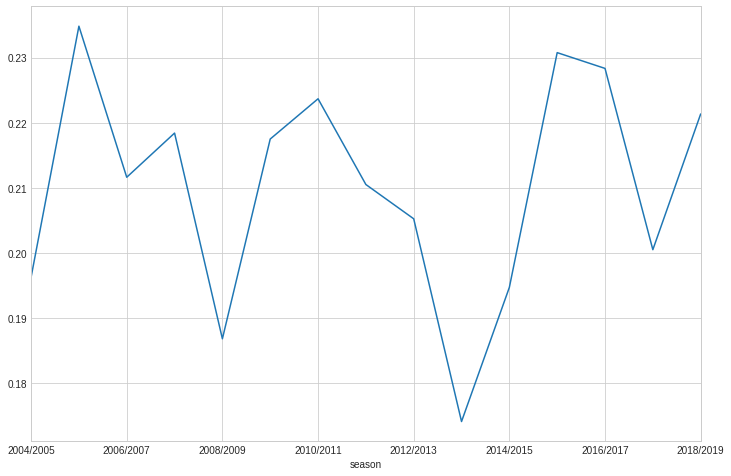

In [506]:
# evolution du worst_pred au cours des saisons 
(ext[ext.worst_pred == 1].groupby('season').count()[1:-1].worst_pred / ext.groupby('season').count()[1:-1].worst_pred).plot()

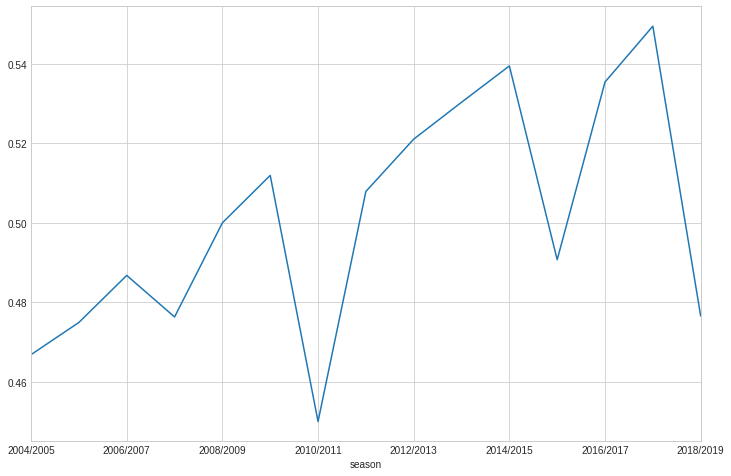

In [512]:
# evolution du good_pred au cours des saisons 
(ext[ext.good_pred == 1].groupby('season').count()[1:-1].worst_pred / ext.groupby('season').count()[1:-1].worst_pred).plot()

       season  counts_good_pred  counts_worst_pred  counts_draw_pred
0   2004/2005          0.466844           0.196286          0.336870
1   2005/2006          0.474934           0.234828          0.290237
2   2006/2007          0.486772           0.211640          0.301587
3   2007/2008          0.476316           0.218421          0.305263
4   2008/2009          0.500000           0.186842          0.313158
5   2009/2010          0.511936           0.217507          0.270557
6   2010/2011          0.450000           0.223684          0.326316
7   2011/2012          0.507895           0.210526          0.281579
8   2012/2013          0.521053           0.205263          0.273684
9   2013/2014          0.530343           0.174142          0.295515
10  2014/2015          0.539474           0.194737          0.265789
11  2015/2016          0.490716           0.230769          0.278515
12  2016/2017          0.535433           0.228346          0.236220
13  2017/2018          0.549479   

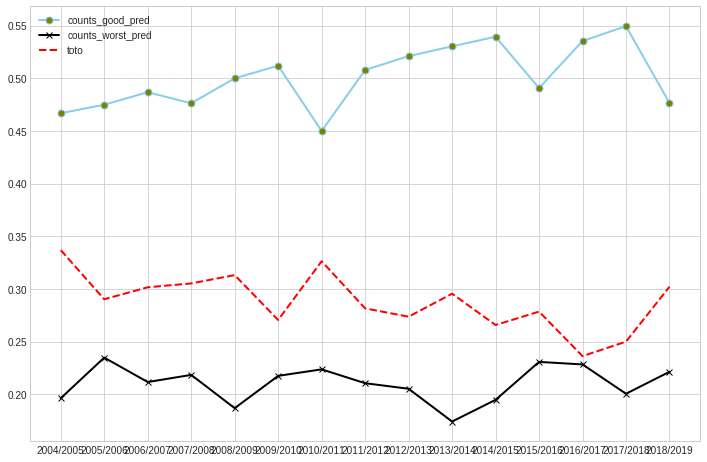

In [594]:
#plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
x = ext[ext.good_pred == 1].groupby('season').count()[1:-1].worst_pred.reset_index(name='counts')['season']
#print(x)
y1 = (ext[ext.good_pred == 1].groupby('season').count()[1:-1].worst_pred / ext.groupby('season').count()[1:-1].worst_pred).reset_index(name='counts_good_pred')
#print(y1)
y2 = (ext[ext.worst_pred == 1].groupby('season').count()[1:-1].worst_pred / ext.groupby('season').count()[1:-1].worst_pred).reset_index(name='counts_worst_pred')
#print(y2)
y3 = (ext[ext.draw_pred == 1].groupby('season').count()[1:-1].worst_pred / ext.groupby('season').count()[1:-1].worst_pred).reset_index(name='counts_draw_pred')

df_plot = pd.DataFrame(x).join(pd.DataFrame(y1).set_index('season'), on='season')
df_plot = pd.DataFrame(df_plot).join(pd.DataFrame(y2).set_index('season'), on='season')
df_plot = pd.DataFrame(df_plot).join(pd.DataFrame(y3).set_index('season'), on='season')
print(df_plot)
plt.plot( 'season', 'counts_good_pred', data=df_plot, marker='o', markerfacecolor='olive', markersize=7, color='skyblue', linewidth=2)
plt.plot(  data=df_plot, marker='o', markerfacecolor='green', markersize=12, color='red', linewidth=2)
plt.plot( 'season', 'counts_worst_pred', data=df_plot, marker='x', color='black', linewidth=2)
plt.plot('season', 'counts_draw_pred', data=df_plot, marker='', color='red', linewidth=2, linestyle='dashed', label="toto")

plt.legend()
#.sort_values(by=['counts'],ascending=False)

In [600]:
#ext['team_a'].value_counts().plot(kind='bar')
#ext['team_a'].value_counts(normalize=True).plot(kind='bar')

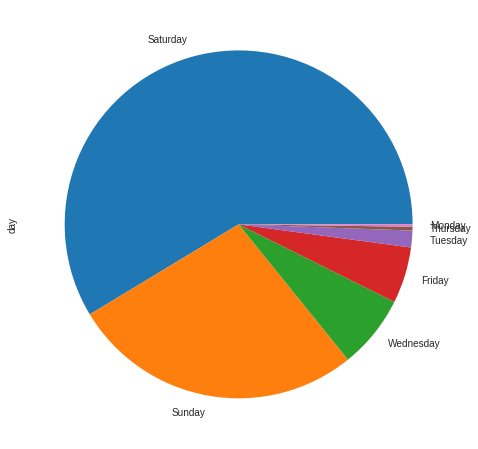

In [482]:
ext["day"].value_counts(normalize=True).plot(kind='pie')

         day    counts
5    Tuesday  0.268817
1     Monday  0.230769
3     Sunday  0.217016
0     Friday  0.214744
2   Saturday  0.206965
6  Wednesday  0.203431
4   Thursday  0.190476


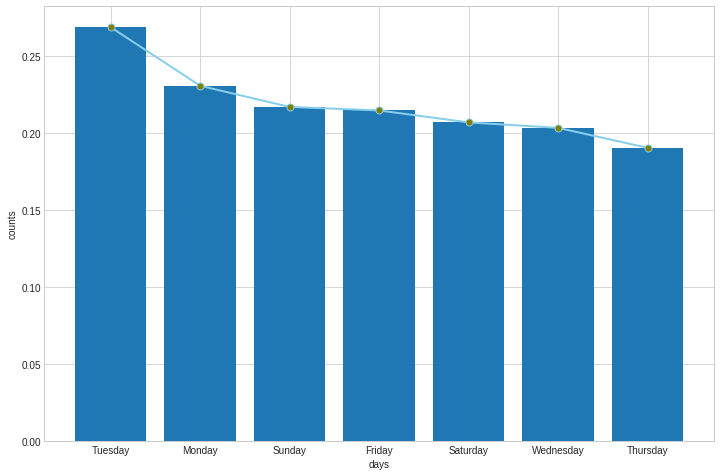

In [619]:
# Répartition des worst_pred par jour
my_plot = (ext[ext.worst_pred ==  1].groupby('day').count().worst_pred / ext.groupby('day').worst_pred.count()).reset_index(name='counts').sort_values(by=['counts'],ascending=False)
print(my_plot)
plt.plot( 'day', 'counts', data=my_plot, marker='o', markerfacecolor='olive', markersize=7, color='skyblue', linewidth=2)
plt.bar(my_plot.day,my_plot.counts,align='center') # A bar chart
plt.xlabel('days')
plt.ylabel('counts')
plt.show()

    hours  counts  total_hours  f_total_hours  total   f_total
20  20:05       6           13       0.461538   5972  0.001005
4   15:00      10           30       0.333333   5972  0.001674
11  17:30      10           32       0.312500   5972  0.001674
5   15:30       3           11       0.272727   5972  0.000502
2   14:00      37          146       0.253425   5972  0.006196
18  19:55       5           20       0.250000   5972  0.000837
10  17:00      39          163       0.239264   5972  0.006530
15  19:30      48          213       0.225352   5972  0.008038
6   16:00     177          795       0.222642   5972  0.029638
13  19:00     441         2033       0.216921   5972  0.073845
12  18:00     202          966       0.209110   5972  0.033825
16  19:45      48          238       0.201681   5972  0.008038
17  19:50       4           20       0.200000   5972  0.000670
19  20:00     177          963       0.183801   5972  0.029638
1   13:00      24          134       0.179104   5972  0

<BarContainer object of 19 artists>

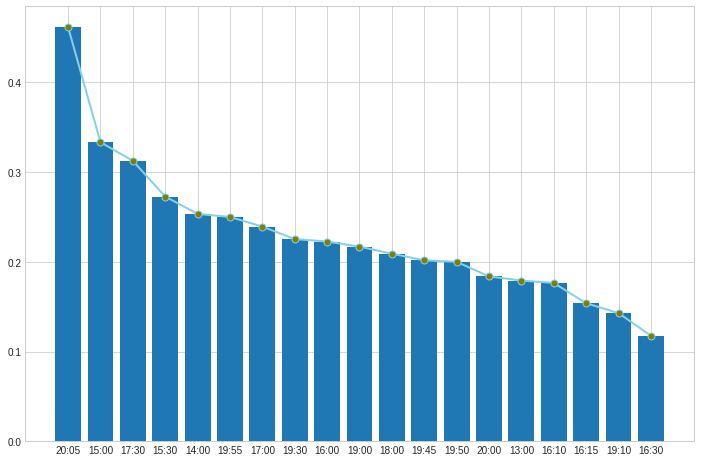

In [623]:
# group by des bmrk loss par hours 
ext_bmkrLoss_day = (ext[ext.worst_pred ==  1].groupby('hours').count().worst_pred).reset_index(name='counts')

#join du total des matchs pour cette hours (attention, toutes les hours n'ont pas de worst_pred)
ext_bmkrLoss_day = ext_bmkrLoss_day.join(pd.DataFrame(ext.groupby('hours').worst_pred.count().reset_index(name='total_hours')).set_index('hours'), on='hours')

# frq pour cette hours
ext_bmkrLoss_day['f_total_hours'] = ext_bmkrLoss_day['counts'] / ext_bmkrLoss_day['total_hours']

# frq sur tout les matches
ext_bmkrLoss_day['total'] = ext.worst_pred.count()
ext_bmkrLoss_day['f_total'] = ext_bmkrLoss_day['counts'] / ext_bmkrLoss_day['total']

# order by 
ext_bmkrLoss_day = ext_bmkrLoss_day.sort_values(by=['f_total_hours'],ascending=False) # 12:30 14:05 20:05 15:00
ext_bmkrLoss_day = ext_bmkrLoss_day[ext_bmkrLoss_day.total_hours > 1].head(25)
print(ext_bmkrLoss_day)
plt.plot( 'hours', 'f_total_hours', data=ext_bmkrLoss_day, marker='o', markerfacecolor='olive', markersize=7, color='skyblue', linewidth=2)
plt.bar(ext_bmkrLoss_day.hours,ext_bmkrLoss_day.f_total_hours,align='center') # A bar chart


In [627]:
# group by des bmrk loss par hours 
ext_bmkrLoss_day = (ext[ext.worst_pred ==  1].groupby(['day','hours']).count().worst_pred).reset_index(name='counts')

#join du total des matchs pour cette hours (attention, toutes les hours n'ont pas de worst_pred)
ext_bmkrLoss_day = ext_bmkrLoss_day.join(pd.DataFrame(ext.groupby(['day','hours']).worst_pred.count().reset_index(name='total_hours')).set_index(['day','hours']), on=['day','hours'])

# frq pour cette hours
ext_bmkrLoss_day['f_total_hours'] = ext_bmkrLoss_day['counts'] / ext_bmkrLoss_day['total_hours']
# frq sur tout les matches
ext_bmkrLoss_day['total'] = ext.worst_pred.count()
ext_bmkrLoss_day['f_total'] = ext_bmkrLoss_day['counts'] / ext_bmkrLoss_day['total']

ext_bmkrLoss_day = ext_bmkrLoss_day.sort_values(by=['f_total_hours'],ascending=False) # 12:30 14:05 20:05 15:00
ext_bmkrLoss_day = ext_bmkrLoss_day[ext_bmkrLoss_day.total_hours > 1].head(10)
ext_bmkrLoss_day

,day,hours,counts,total_hours,f_total_hours,total,f_total
7,Friday,20:05,5,10,0.500000,5972,0.000837
39,Tuesday,17:30,3,6,0.500000,5972,0.000502
28,Sunday,15:30,3,7,0.428571,5972,0.000502
13,Saturday,15:00,5,14,0.357143,5972,0.000837
12,Saturday,14:00,4,12,0.333333,5972,0.000670
36,Sunday,20:05,1,3,0.333333,5972,0.000167
43,Tuesday,19:45,1,3,0.333333,5972,0.000167
41,Tuesday,19:00,1,3,0.333333,5972,0.000167
27,Sunday,15:00,5,16,0.312500,5972,0.000837
45,Wednesday,17:30,6,20,0.300000,5972,0.001005


In [628]:
#ext[(ext.day == "Friday") & (ext.hours == "20:05")]